In [19]:
import pandas as pd
# Suponiendo que results_df_HealthCare y results_df_Insurance ya están definidos y listos para ser fusionados.
results_df_HealthCare = pd.read_csv('results_df_HealthCare.csv')
results_df_Insurance = pd.read_csv('results_df_Insurance.csv')
results_df_PublicHealth = pd.read_csv('PublicHealth_comments_df.csv')

# Fusionar los DataFrames en uno solo, usando 'Comment Body' como clave.
merged_df = pd.merge(results_df_HealthCare, results_df_Insurance, on='Comment Body', how='outer', suffixes=('_HealthCare', '_Insurance'))
merged_df = pd.merge(merged_df, results_df_PublicHealth, on='Comment Body', how='outer', suffixes=('', '_PublicHealth'))
# Resolver conflictos de columnas duplicadas eligiendo los valores de HealthCare como prioritarios.
# Esto es solo un ejemplo de cómo manejar las columnas duplicadas; ajusta según sea necesario.
merged_df['Actual Sentiment'] = merged_df['Actual Sentiment_HealthCare'].combine_first(merged_df['Actual Sentiment_Insurance'])
merged_df['Predicted Sentiment'] = merged_df['Predicted Sentiment_HealthCare'].combine_first(merged_df['Predicted Sentiment_Insurance'])

# Eliminar las columnas ahora redundantes.
merged_df.drop(columns=['Actual Sentiment_HealthCare', 'Actual Sentiment_Insurance', 'Predicted Sentiment_HealthCare', 'Predicted Sentiment_Insurance'], inplace=True)

# El DataFrame resultante, merged_df, ahora tiene solo 4 columnas: 'Comment Body', 'Actual Sentiment', y 'Predicted Sentiment'.
merged_df

,Comment Body,Actual Sentiment,Predicted Sentiment
0,"In fairness, several of the countries that spe...",Positive,Positive
1,Do these new case reports ever take into accou...,Neutral,Positive
2,It’s ironic. Independence Day 2020 could turn ...,Positive,Positive
3,"So, ""not for profit"" doesn't mean no one is ma...",Positive,Positive
4,What are you implying,Neutral,Neutral
...,...,...,...
161,That’s their goal: they actively want to punis...,NaN,NaN
162,Interestingly - there's \n\n* a correlation be...,NaN,NaN
163,What a brave person! It takes courage to stand...,NaN,NaN
164,"And why should we reform our education system,...",NaN,NaN


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Function to create a bar chart for actual vs predicted sentiments
def plot_sentiment_comparison(merged_df):
    sentiment_counts = merged_df[['Actual Sentiment', 'Predicted Sentiment']].apply(pd.Series.value_counts)
    sentiment_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of Actual and Predicted Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Function to create a confusion matrix to visualize the accuracy of predictions
def plot_confusion_matrix(merged_df):
    confusion_matrix = pd.crosstab(merged_df['Actual Sentiment'], merged_df['Predicted Sentiment'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.title('Confusion Matrix for Sentiment Prediction')
    plt.show()

# Function to create a pie chart to show the distribution of sentiments
def plot_sentiment_distribution(merged_df, sentiment_type):
    sentiment_distribution = merged_df[sentiment_type].value_counts()
    sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Distribution of {sentiment_type} Sentiments')
    plt.show()

# Function to create a word cloud for the most frequent words in the comments
def plot_word_cloud(merged_df):
    text = ' '.join(merged_df['Comment Body'].dropna().tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Comments')
    plt.show()




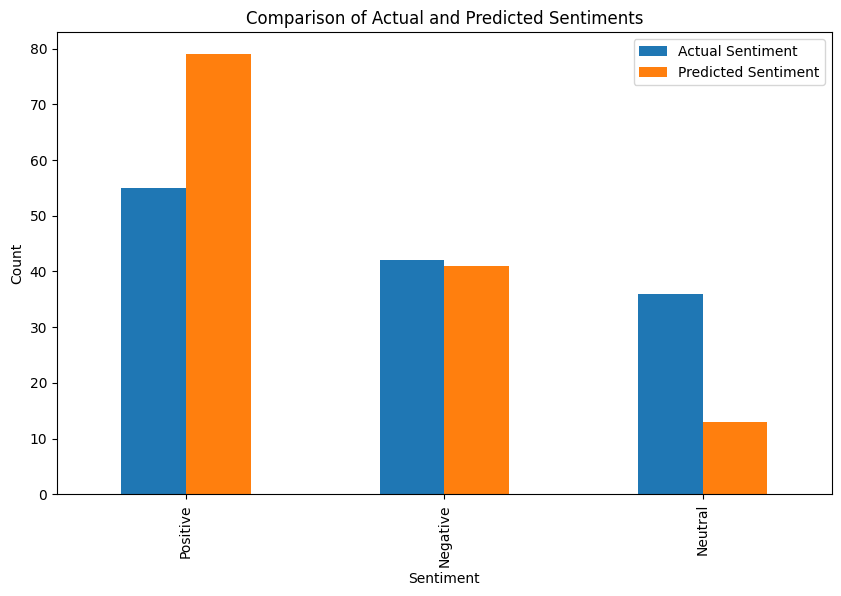

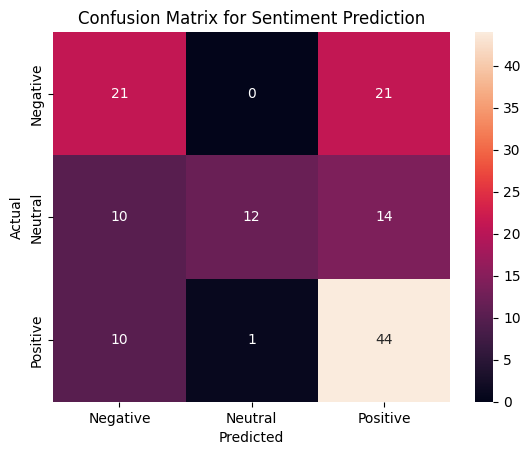

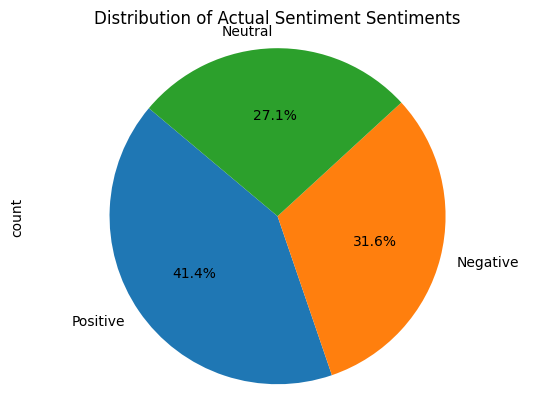

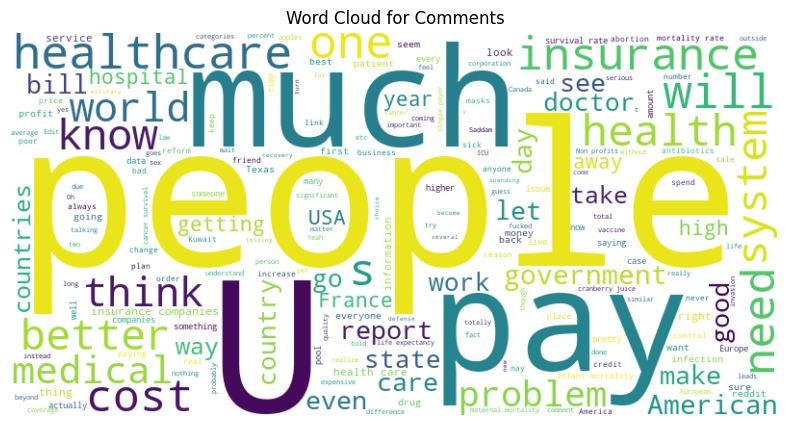

In [22]:
plot_sentiment_comparison(merged_df)
plot_confusion_matrix(merged_df)
plot_sentiment_distribution(merged_df, 'Actual Sentiment')
plot_word_cloud(merged_df)
